In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Train.csv')
df.head()

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,2,NaN,neutral
2,3,no politics danger now i can make a propaganda...,negative
3,4,i am the senate gets stabbed,neutral
4,5,is this a suicide,neutral


In [82]:
df1=pd.read_csv('Test.csv')
df1.head()

,Id,Body
0,1,rule 2 no metes about polarizing political top...
1,2,NaN
2,3,no politics danger now i can make a propaganda...
3,4,i am the senate gets stabbed
4,5,is this a suicide


In [83]:
df=df.drop(['Id'],axis=1)
df1=df1.drop(['Id'],axis=1)

In [84]:
df.head()

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,NaN,neutral
2,no politics danger now i can make a propaganda...,negative
3,i am the senate gets stabbed,neutral
4,is this a suicide,neutral


In [85]:
df1.head()

,Body
0,rule 2 no metes about polarizing political top...
1,NaN
2,no politics danger now i can make a propaganda...
3,i am the senate gets stabbed
4,is this a suicide


In [86]:
df.isnull().sum()

,0
Body,228
Sentiment Type,0


In [87]:
df1.isnull().sum()

,0
Body,228


In [88]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [89]:
df.head()

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
2,no politics danger now i can make a propaganda...,negative
3,i am the senate gets stabbed,neutral
4,is this a suicide,neutral
5,removed,neutral


In [90]:
!pip install emoji nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    # Convert emojis to descriptive text
    text = emoji.demojize(text)

    # Convert to lowercase
    text = text.lower()

    # Expand contractions
    text = text.replace("n't"," not")
    text = text.replace("'m"," am")
    text = text.replace("'s"," is")
    text = text.replace("'re"," are")
    text = text.replace("'ll"," will")
    text = text.replace("'ve"," have")
    text = text.replace("'d"," would")
    text = text.replace("won't", "will not")
    text = text.replace("can't", "cannot")

    text = re.sub(r'http\S+|www\S+', '', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    # Normalize repeated characters
    text = re.sub(r'(.)\1+', r'\1\1', text)  # e.g., goooood -> good

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    text = re.sub(r'\s+', ' ', text).strip()

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
df=df.applymap(preprocessing)
df1=df1.applymap(preprocessing)


In [92]:
df.head()

,Body,Sentiment Type
0,rule mete polarizing political topic vulnerabl...,neutral
2,politics danger make propaganda meme telling p...,negative
3,senate get stabbed,neutral
4,suicide,neutral
5,removed,neutral


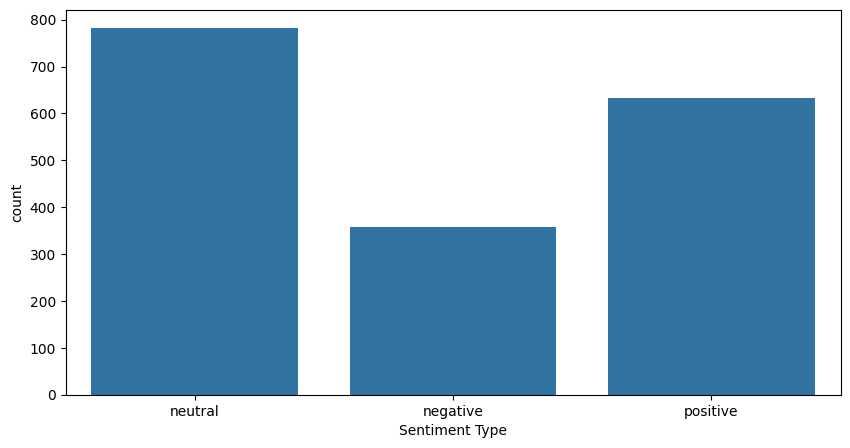

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment Type',data=df)
plt.show()

In [94]:
tf=df.copy()
rf=df1.copy()

In [95]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Body']=le.fit_transform(df['Body'])
df1['Body']=le.fit_transform(df1['Body'])

In [96]:
df.head()

,Body,Sentiment Type
0,1246,neutral
2,1128,negative
3,1281,neutral
4,1377,neutral
5,1213,neutral


In [97]:
df1.head()

,Body
0,1246
2,1128
3,1281
4,1377
5,1213


In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Body']=sc.fit_transform(df[['Body']])
df1['Body']=sc.fit_transform(df1[['Body']])

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train=df.drop(['Sentiment Type'],axis=1)
y_train=df['Sentiment Type']
x_test=df1

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_pred,y_train)
print(accuracy)


0.44130925507900676


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train=df.drop(['Sentiment Type'],axis=1)
y_train=df['Sentiment Type']
x_test=df1

model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_pred,y_train)
print(accuracy)

0.6422121896162528


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train=df.drop(['Sentiment Type'],axis=1)
y_train=df['Sentiment Type']
x_test=df1

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_pred,y_train)
print(accuracy)

1.0


In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

x_train=df.drop(['Sentiment Type'],axis=1)
y_train=df['Sentiment Type']
x_test=df1

model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_pred,y_train)
print(accuracy)

0.44130925507900676


In [103]:
from sklearn.linear_model import Perceptron

x_train=df.drop(['Sentiment Type'],axis=1)
y_train=df['Sentiment Type']
x_test=df1

model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_pred,y_train)
print(accuracy)

0.35665914221218964


In [104]:
from sklearn.preprocessing import MinMaxScaler

# Replace StandardScaler with MinMaxScaler
sc = MinMaxScaler()

df['Body'] = sc.fit_transform(df[['Body']])
df1['Body'] = sc.fit_transform(df1[['Body']])

In [105]:
from sklearn import naive_bayes
x_train=df.drop(['Sentiment Type'],axis=1)
y_train=df['Sentiment Type']
x_test=df1

model=naive_bayes.MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_pred,y_train)
print(accuracy)
#

0.44130925507900676


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Assuming 'tf' and 'rf' are your DataFrames
x_train = tf['Body']  # Use the 'Body' column directly for vectorization
y_train = tf['Sentiment Type']
x_test = rf['Body']  # Use the 'Body' column from 'rf' for testing

x_train = vectorizer.fit_transform(x_train.values.astype('U')) # Convert to unicode
x_test = vectorizer.transform(x_test.values.astype('U')) # Convert to unicode

x_train.shape

(1772, 3553)

In [111]:
x_test.shape

(1772, 3553)